In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Loading the dataset
df = pd.read_csv("FCB Player stats.csv")

# 1. Cleaning and Preparing the data

In [114]:
# Looking for some info about the dataset especially nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         27 non-null     int64  
 1   Player             27 non-null     object 
 2   Position           27 non-null     object 
 3   Minutes            27 non-null     int64  
 4   Goals              27 non-null     int64  
 5   Assists            27 non-null     int64  
 6   YellowCards        26 non-null     float64
 7   RedCards           26 non-null     float64
 8   Recoveries         27 non-null     int64  
 9   Touches            27 non-null     int64  
 10  ChancesCreated     27 non-null     int64  
 11  BigChancesCreated  27 non-null     int64  
 12  DuelsWon           27 non-null     int64  
 13  Yellows            1 non-null      float64
 14  Reds               1 non-null      float64
dtypes: float64(4), int64(9), object(2)
memory usage: 3.3+ KB


In [115]:
# Exploring the first five rows of the dataset to get some information about it
df.head()

,Unnamed: 0,Player,Position,Minutes,Goals,Assists,YellowCards,RedCards,Recoveries,Touches,ChancesCreated,BigChancesCreated,DuelsWon,Yellows,Reds
0,0,Marc-André ter Stegen,Goalkeeper,810,0,0,0.0,0.0,0,1000,0,0,0,NaN,NaN
1,1,Iñaki Peña,Goalkeeper,2070,0,0,1.0,0.0,0,2000,0,0,0,NaN,NaN
2,2,Wojciech Szczęsny,Goalkeeper,2700,0,0,0.0,1.0,0,1500,0,0,0,NaN,NaN
3,3,Pau Cubarsí,Center Back,5040,0,1,5.0,1.0,120,2200,4,1,80,NaN,NaN
4,4,Alejandro Balde,Left Back,4230,0,8,3.0,0.0,100,3000,12,2,120,NaN,NaN


In [116]:
# Droping two useless columns in the dataset which are mostly NaN values
df.drop('Yellows', inplace= True, axis= 1)
df.drop('Reds', inplace= True, axis= 1)

In [117]:
# Making sure the dataset is updated
df.head(1)

,Unnamed: 0,Player,Position,Minutes,Goals,Assists,YellowCards,RedCards,Recoveries,Touches,ChancesCreated,BigChancesCreated,DuelsWon
0,0,Marc-André ter Stegen,Goalkeeper,810,0,0,0.0,0.0,0,1000,0,0,0


In [118]:
# Finding the location of Raphinha
df[df['Player'] == 'Raphinha']

,Unnamed: 0,Player,Position,Minutes,Goals,Assists,YellowCards,RedCards,Recoveries,Touches,ChancesCreated,BigChancesCreated,DuelsWon
25,25,Raphinha,Left Wing,5490,34,8,NaN,NaN,127,2622,239,34,140


In [119]:
# Filling Raphinha's yellow cards based on official stats: Raphinha recieved 7 yellow cards in the 24/25 season in all club competitions
if pd.isna(df.loc[25, 'YellowCards']):
  df.loc[25, 'YellowCards'] = 7

In [120]:
# Filling Raphinha's red cards based on official stats: Raphinha recieved no red cards in the 24/25 season in all club competitions
if pd.isna(df.loc[25, 'RedCards']):
  df.loc[25, 'RedCards'] = 0

In [121]:
# Changing Jules Kounde, Eric Garcia and Hector Fort's positions cause they are oficially right backs
df.loc[8, 'Position'] = 'Right Back'
df.loc[9, 'Position'] = 'Right Back'
df.loc[10, 'Position'] = 'Right Back'

In [122]:
# Changing Gerard Martin's position because he is a left back.
df.loc[11, 'Position'] = 'Left Back'
df.loc[11, 'Player'] = 'Gerard Martin'

In [123]:
# changing Pedri's position to Offensive Midfielder:
df.loc[14, 'Position'] = 'Offensive Midfielder'

In [124]:
# Making sure if the dataset is clean of nulls
df.isna().any().any()

np.False_

In [125]:
df.isna().sum().sum()
# And now the dataset is clean and ready from null data's.

np.int64(0)

In [126]:
# droping the 'Unnamed: 0' index
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [127]:
df.head(1)

,Player,Position,Minutes,Goals,Assists,YellowCards,RedCards,Recoveries,Touches,ChancesCreated,BigChancesCreated,DuelsWon
0,Marc-André ter Stegen,Goalkeeper,810,0,0,0.0,0.0,0,1000,0,0,0


In [128]:
# changing the data types of some features
df['YellowCards'] = pd.to_numeric(df['YellowCards'], errors='coerce').astype(int)
df['RedCards'] = pd.to_numeric(df['RedCards'], errors='coerce').astype(int)

In [129]:
df
# And now the dataset is clean and ready for action.

,Player,Position,Minutes,Goals,Assists,YellowCards,RedCards,Recoveries,Touches,ChancesCreated,BigChancesCreated,DuelsWon
0,Marc-André ter Stegen,Goalkeeper,810,0,0,0,0,0,1000,0,0,0
1,Iñaki Peña,Goalkeeper,2070,0,0,1,0,0,2000,0,0,0
2,Wojciech Szczęsny,Goalkeeper,2700,0,0,0,1,0,1500,0,0,0
3,Pau Cubarsí,Center Back,5040,0,1,5,1,120,2200,4,1,80
4,Alejandro Balde,Left Back,4230,0,8,3,0,100,3000,12,2,120
5,Ronald Araújo,Center Back,2250,2,0,4,0,110,1800,3,1,95
6,Iñigo Martínez,Center Back,4140,3,0,9,0,130,2400,5,2,110
7,Andreas Christensen,Center Back,540,0,0,3,0,40,900,2,0,35
8,Jules Koundé,Right Back,4770,4,8,6,0,140,2800,15,1,130
9,Eric García,Right Back,4050,5,3,4,1,150,2600,10,0,110


In [130]:
df.to_excel(r'C:\Users\sky for technology\Desktop\FCB Player Stats.xlsx', index=False)

# 2. Core Statistics and Analysis

In [131]:
# 1. top five players with the most minutes played
topMins = df.sort_values(by= 'Minutes', ascending= False)[['Player', 'Minutes']][:5].reset_index(drop= True)
for i, player in topMins.iterrows():
  print(f"{i + 1}. {player['Player']} - {player['Minutes']} Minutes")

1. Raphinha - 5490 Minutes
2. Pedri - 5310 Minutes
3. Pau Cubarsí - 5040 Minutes
4. Lamine Yamal - 4950 Minutes
5. Jules Koundé - 4770 Minutes


In [132]:
# 2. Adding a new column "Goal Contribution" (Goals + Assists)
df['Goal Contributions'] = df['Goals'] + df['Assists']

In [133]:
df

,Player,Position,Minutes,Goals,Assists,YellowCards,RedCards,Recoveries,Touches,ChancesCreated,BigChancesCreated,DuelsWon,Goal Contributions
0,Marc-André ter Stegen,Goalkeeper,810,0,0,0,0,0,1000,0,0,0,0
1,Iñaki Peña,Goalkeeper,2070,0,0,1,0,0,2000,0,0,0,0
2,Wojciech Szczęsny,Goalkeeper,2700,0,0,0,1,0,1500,0,0,0,0
3,Pau Cubarsí,Center Back,5040,0,1,5,1,120,2200,4,1,80,1
4,Alejandro Balde,Left Back,4230,0,8,3,0,100,3000,12,2,120,8
5,Ronald Araújo,Center Back,2250,2,0,4,0,110,1800,3,1,95,2
6,Iñigo Martínez,Center Back,4140,3,0,9,0,130,2400,5,2,110,3
7,Andreas Christensen,Center Back,540,0,0,3,0,40,900,2,0,35,0
8,Jules Koundé,Right Back,4770,4,8,6,0,140,2800,15,1,130,12
9,Eric García,Right Back,4050,5,3,4,1,150,2600,10,0,110,8


In [134]:
# 3. Top 5 players by Goal Contribution
topGoalConts = df.sort_values(by= 'Goal Contributions', ascending= False)[['Player', 'Goal Contributions']][:5].reset_index(drop= True)
for i, player in topGoalConts.iterrows():
  print(f"{i + 1}, {player['Player']} : {player['Goal Contributions']} Goal Contributions")

1, Robert Lewandowski : 45 Goal Contributions
2, Raphinha : 42 Goal Contributions
3, Lamine Yamal : 39 Goal Contributions
4, Ferran Torres : 26 Goal Contributions
5, Dani Olmo : 18 Goal Contributions


In [135]:
# 4. Group by Position and calculate:
#    Average Goals, Assists, Minutes, and Recoveries per position
byPosition = df.groupby('Position')[['Goals', 'Assists', 'Minutes', 'Recoveries']].mean().reset_index()
position_order = [
    'Goalkeeper',
    'Right Back',
    'Left Back',
    'Center Back',
    'Defensive Midfielder',
    'Offensive Midfielder',
    'Left Wing',
    'Right Wing',
    'Striker'
]
byPosition['Position'] = pd.Categorical(byPosition['Position'], categories=position_order, ordered=True)
byPosition = byPosition.sort_values('Position').reset_index(drop=True)
byPosition

,Position,Goals,Assists,Minutes,Recoveries
0,Goalkeeper,0.000000,0.000000,1860.0,0.000000
1,Right Back,3.000000,3.666667,3540.0,113.333333
2,Left Back,0.500000,4.000000,4005.0,80.000000
3,Center Back,1.000000,0.200000,2502.0,86.000000
4,Defensive Midfielder,1.500000,4.250000,2835.0,117.500000
5,Offensive Midfielder,7.500000,6.500000,3532.5,153.500000
6,Left Wing,18.000000,5.000000,4050.0,81.000000
7,Right Wing,18.000000,21.000000,4950.0,80.000000
8,Striker,20.333333,3.333333,3240.0,53.333333


In [136]:
# 5. Who had the most "Chances Created" and most Duels Won?
mostChancesCreated = df[df['ChancesCreated'] == df['ChancesCreated'].max()][['Player', 'ChancesCreated']].reset_index(drop= True)
for i, player in mostChancesCreated.iterrows():
  print(f"{i + 1}. {player['Player']} has created the most amount of chances in the season with {player['ChancesCreated']}")

1. Raphinha has created the most amount of chances in the season with 239


In [137]:
mostDuelsWon = df[df['DuelsWon'] == df['DuelsWon'].max()][['Player', 'DuelsWon']].reset_index(drop= True)

name = mostDuelsWon['Player'].tolist()
duels = mostDuelsWon['DuelsWon'][0]

if len(name) == 1:
  print(f"{name} has won the most duels in this season with {duels} duels")
else:
  joinedNames = ' and '.join(name)
  print(f"{name} has won the most duels in this season with {duels} duels")

['Gavi', 'Raphinha'] has won the most duels in this season with 140 duels


In [138]:
# 5. Together A player that has won the most amount of duels and created the most amount of chances:
mostDuelsAndChances = df[(df['BigChancesCreated'] == df['BigChancesCreated'].max()) & (df['DuelsWon'] == df['DuelsWon'].max())][['Player', 'ChancesCreated', 'DuelsWon']].reset_index()

for i, player in mostDuelsAndChances.iterrows():
  print(f"{i + 1}. {player['Player']} has create the most amount of chances ({player['ChancesCreated']}) and has won the most duels ({player['DuelsWon']})")

1. Raphinha has create the most amount of chances (239) and has won the most duels (140)


In [139]:
# 6. Find the cleanest players (least Yellow + Red cards combined)
print('Players with least (Yellow + Redcards) conceded:')
df['Cards'] = df['YellowCards'] + df['RedCards']
df[df['Cards'] == df['Cards'].min()][['Player', 'Cards']].reset_index(drop= True)

Players with least (Yellow + Redcards) conceded:


,Player,Cards
0,Marc-André ter Stegen,0
1,Pablo Torre,0
2,Ansu Fati,0


In [140]:
# 7. Calculate a new column called "Efficiency" = (Goal Contribution ÷ Minutes) × 90
# → This estimates contribution per 90 minutes played
# → Rank players by efficiency
print('Players with most Goal contributions per 90 minutes:')
df['Efficiency'] = (df['Goal Contributions'] / df['Minutes']) * 90
df.sort_values(by= 'Efficiency', ascending= False)[['Player', 'Efficiency']].reset_index(drop= True)

Players with most Goal contributions per 90 minutes:


,Player,Efficiency
0,Robert Lewandowski,0.865385
1,Lamine Yamal,0.709091
2,Raphinha,0.688525
3,Ferran Torres,0.577778
4,Pablo Torre,0.538462
5,Dani Olmo,0.461538
6,Fermín López,0.369565
7,Pedri,0.237288
8,Jules Koundé,0.226415
9,Marc Casadó,0.200000


# Doing some Analysis by my self.

In [141]:
# Which position has palyed the most amount of minutes, this as an insight tells as which position has a lot of load on it.
# So maybe in the new season whether you re inforce the position or have new plans.
dfByPosition = df.groupby('Position')['Minutes'].sum().rename_axis().reset_index(name= 'Minutes Played')
dfByPosition.sort_values(by= 'Minutes Played', ascending= False).reset_index(drop= True)

,Position,Minutes Played
0,Offensive Midfielder,14130
1,Center Back,12510
2,Defensive Midfielder,11340
3,Right Back,10620
4,Striker,9720
5,Left Wing,8100
6,Left Back,8010
7,Goalkeeper,5580
8,Right Wing,4950


In [142]:
# This stat shows the player that has contributed deffensivly a lot,
# it is a very good stat to manage the difense and justify the players that are good deffensivly
print('Players who has made the most amount of recoveries in the season:')
df.sort_values(by= 'Recoveries', ascending= False)[['Player', 'Recoveries']].reset_index(drop= True)

Players who has made the most amount of recoveries in the season:


,Player,Recoveries
0,Pedri,254
1,Gavi,200
2,Fermín López,180
3,Frenkie de Jong,170
4,Eric García,150
5,Jules Koundé,140
6,Iñigo Martínez,130
7,Raphinha,127
8,Pau Cubarsí,120
9,Dani Olmo,120


In [143]:
# This is the same stat about recoveries but in a defferent insight and side.
# It is absed on the position which position has contributed a lot diffensivly.
# Using this stat helps to manage and improve the structure of the team diffensivly.

print('The Positions that has contributed in recoveries a lot: ')
dfRecoveriesPos = df.groupby('Position')['Recoveries'].sum().reset_index(name= 'Total Recoveries')
dfRecoveriesPos.sort_values(by= 'Total Recoveries', ascending= False).reset_index(drop= True)

The Positions that has contributed in recoveries a lot: 


,Position,Total Recoveries
0,Offensive Midfielder,614
1,Defensive Midfielder,470
2,Center Back,430
3,Right Back,340
4,Left Wing,162
5,Striker,160
6,Left Back,160
7,Right Wing,80
8,Goalkeeper,0


In [144]:
print('Positions with most chances created: ')
dfChances = df.groupby('Position')['ChancesCreated'].sum().reset_index(name= 'Total Chances Created')
dfChances.sort_values(by= 'Total Chances Created', ascending= False).reset_index(drop= True)

Positions with most chances created: 


,Position,Total Chances Created
0,Offensive Midfielder,402
1,Left Wing,259
2,Defensive Midfielder,175
3,Striker,140
4,Right Wing,64
5,Right Back,26
6,Left Back,15
7,Center Back,14
8,Goalkeeper,0


In [145]:
print('Positions with most big chances created: ')
dfChances = df.groupby('Position')['BigChancesCreated'].sum().reset_index(name= 'Total big Chances Created')
dfChances.sort_values(by= 'Total big Chances Created', ascending= False).reset_index(drop= True)

Positions with most big chances created: 


,Position,Total big Chances Created
0,Offensive Midfielder,48
1,Left Wing,34
2,Defensive Midfielder,7
3,Striker,6
4,Right Wing,5
5,Center Back,4
6,Left Back,2
7,Right Back,1
8,Goalkeeper,0


# 3. Visualization

C:\Users\sky for technology\AppData\Local\Temp\ipykernel_2080\1321925936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'Player', y= 'Goal Contributions', data= topGoalConts, palette= 'coolwarm', gap=0.3, saturation=1)


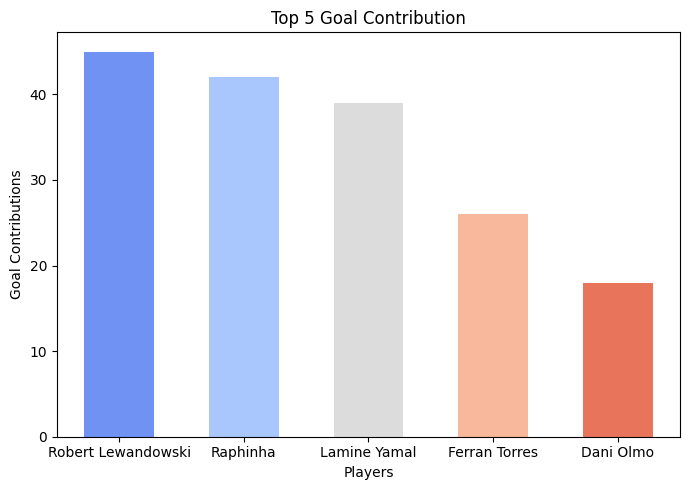

In [146]:
# 1. 📊 Barplot of top 5 players by goal contribution
plt.figure(figsize= (7, 5))
sns.barplot(x= 'Player', y= 'Goal Contributions', data= topGoalConts, palette= 'coolwarm', gap=0.3, saturation=1)
plt.title('Top 5 Goal Contribution')
plt.xlabel('Players')
plt.ylabel('Goal Contributions')
plt.tight_layout()
plt.show()

C:\Users\sky for technology\AppData\Local\Temp\ipykernel_2080\1463496531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'Position', y= 'Recoveries', data= df, palette= 'coolwarm', dodge= False, )


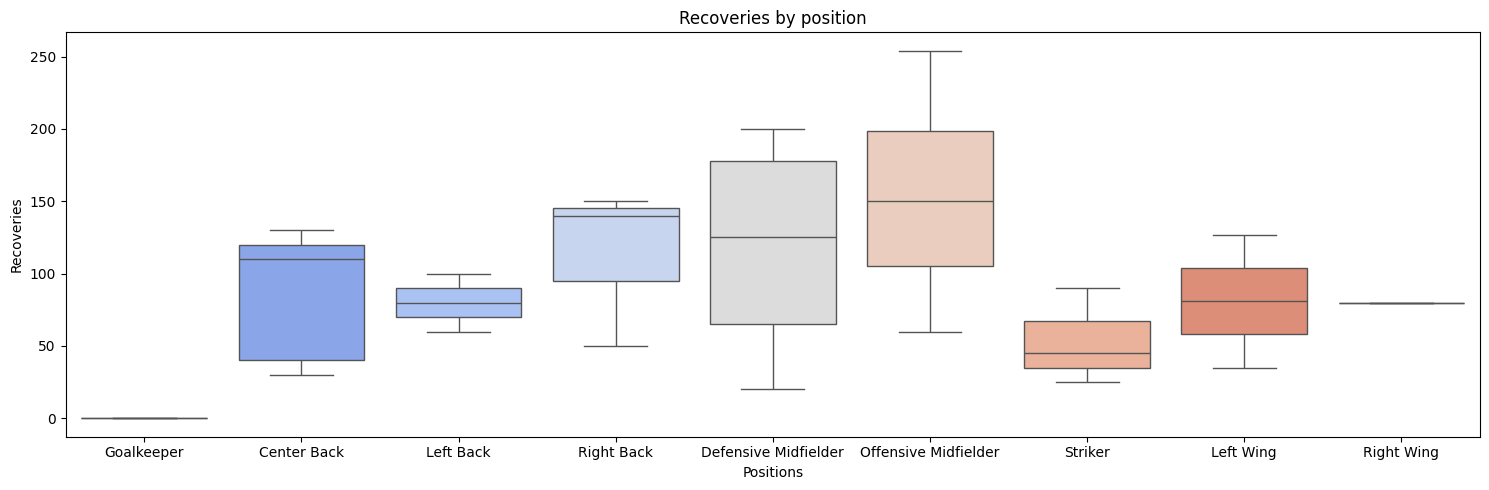

In [147]:
# 2. 🎨 Stripplot or boxplot of recoveries by position
plt.figure(figsize=(15, 5))
sns.boxplot(x= 'Position', y= 'Recoveries', data= df, palette= 'coolwarm', dodge= False, )
plt.title('Recoveries by position')
plt.xlabel('Positions')
plt.ylabel('Recoveries')
plt.tight_layout()
plt.show()

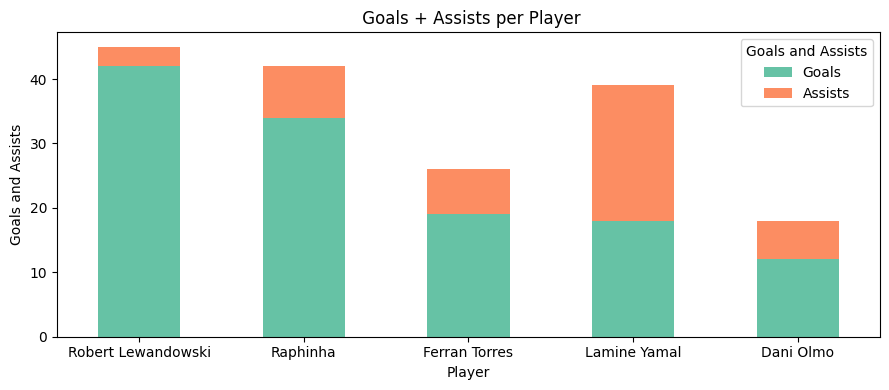

In [148]:
# 3. 🧱 Stacked bar chart of goals vs assists
colors = sns.color_palette("Set2")
gAA = df.sort_values(by= ['Goals', 'Assists'], ascending= False)[['Player', 'Goals', 'Assists']][:5].reset_index(drop= True)
gAA = gAA.set_index('Player')

plt.figure(figsize=(9, 4))

gAA[['Goals', 'Assists']].plot(kind= 'bar', stacked= True, color = colors, ax= plt.gca())

plt.title(" Goals + Assists per Player")
plt.xlabel("Player")
plt.ylabel("Goals and Assists")
plt.legend(title="Goals and Assists")
plt.xticks(rotation = 0)
plt.tight_layout()

plt.savefig(r'C:\Users\sky for technology\Desktop\Data Science Journey\Basic Python\Final Project - Data Analysis Project\PLot Images\Goals-Assists-perPlayer.pdf')

plt.show()

([<matplotlib.patches.Wedge object at 0x0000015EA1A84690>, <matplotlib.patches.Wedge object at 0x0000015EA1A84B90>, <matplotlib.patches.Wedge object at 0x0000015EA1A85090>, <matplotlib.patches.Wedge object at 0x0000015EA1A85590>, <matplotlib.patches.Wedge object at 0x0000015EA1A85A90>, <matplotlib.patches.Wedge object at 0x0000015EA1A85F90>, <matplotlib.patches.Wedge object at 0x0000015EA1A86490>, <matplotlib.patches.Wedge object at 0x0000015EA1A86990>, <matplotlib.patches.Wedge object at 0x0000015EA1A86E90>], [Text(-0.49089051517030247, 0.9843914374454074, 'Center Back'), Text(-1.0719532967692944, 0.24681193152973968, 'Defensive Midfielder'), Text(-1.0134431654876703, -0.4277066171177747, 'Goalkeeper'), Text(-0.6821526202647339, -0.8629413668760804, 'Left Back'), Text(-0.08046508605753382, -1.097053038793364, 'Left Wing'), Text(0.7488288161390053, -0.8057638637466039, 'Offensive Midfielder'), Text(1.095227792070917, 0.10235274043944445, 'Right Back'), Text(0.8629415647458156, 0.682152

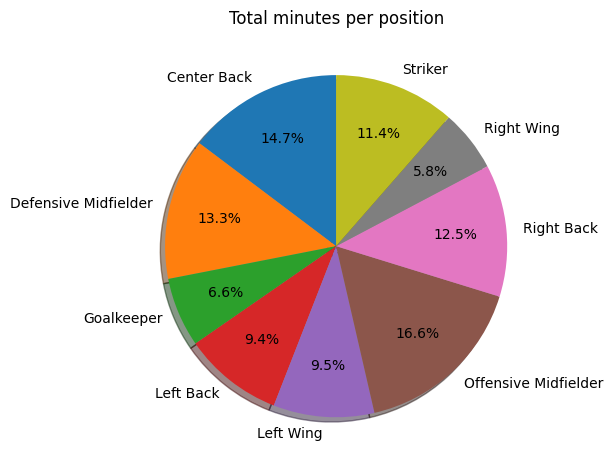

In [149]:
# 4. 🥧 Pie chart of total minutes per position
dfPie = plt.pie(dfByPosition['Minutes Played'], labels= dfByPosition['Position'],startangle= 90 ,autopct='%1.1f%%', shadow= True, pctdistance= 0.7, counterclock= True, frame= False, rotatelabels= False)
print(dfPie)

plt.title('Total minutes per position')
plt.tight_layout()

plt.savefig(r'Total-Minutes-per-Position.pdf')

plt.show()

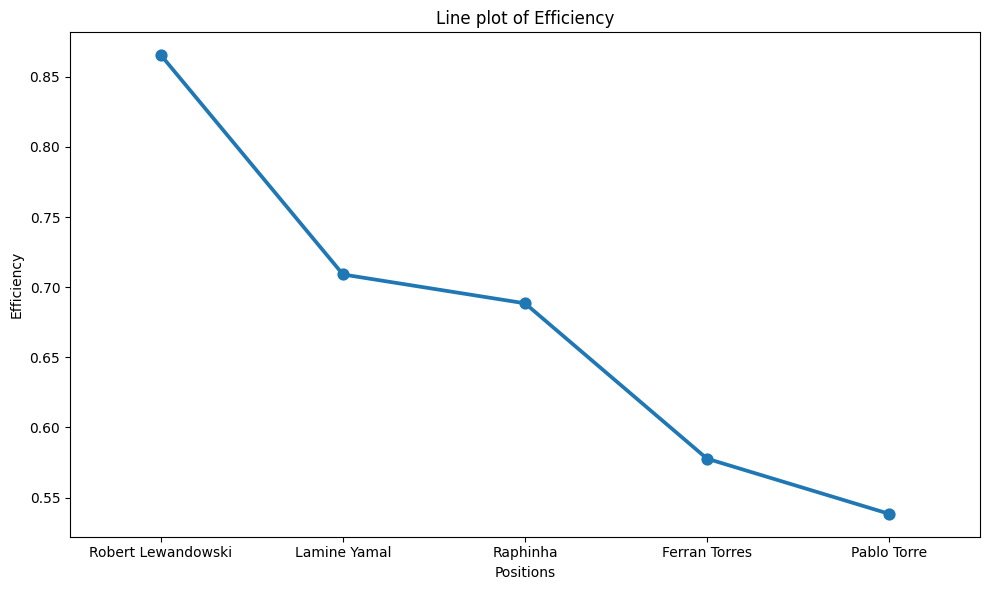

In [150]:
 # 5. 📈 Line plot of efficiency (optional)
dfEff = df.sort_values(by= 'Efficiency', ascending= False)[['Player', 'Efficiency']].reset_index(drop= True)[:5]
plt.figure(figsize= (10, 6))
sns.pointplot(x= 'Player', y= 'Efficiency', data= dfEff)
plt.title('Line plot of Efficiency')
plt.xlabel('Positions')
plt.ylabel('Efficiency')
plt.tight_layout()
plt.show()

# 4. Insights and Recommendation

In [151]:
# Insights  and recommendations:

# 1. Negative things: first let's talk about some negative thing based on the data that we have;
# A/ Let's start with the depth of the squad, if we look at the depth of the squad we see that the right wing position is very week to a level,
#    that we just have lamin as a right wing, it shows that lamin has played a lot of minutes which it is a big load on the player,
#    another thing about this positions is we have seen in the data the the right wing possition is low in terms of chance creation, diffensivly
#    and overall contribution to play in any way compared to the other positions. Another position that requires more players is the left back
#    position we have noticed that contributing offensivly the left back position is weak both deffensivly and offensivly especially offensivly
#    so it requires re strengthen by targeting a more attacking left back. Overall the attack seems to be a little bit weak, even tho the attack
#    has contributed in scoring a lot but it is just the three players (Lamin, Lewa, Raphinha), which is not enought and it is a lot of load on them.
#    So we have come to the conclusion that the attack overall need couple more players.

# B There are also some players that their stats are not good and we probably have sell them one of them, being anso fati, anso is barely contributing
#    with the team and he get a lot of money, so it is a good idea to sell him in summer and bringing new looks to the team. Now that we have three
#    keeper it is also important to take into account to seel a keeper or two  bringing a new super keeper, since no keeper has been consistent.
#    based on the amount of minutes that they have played which is not looking good.

# C. Another negative thing could be the contribution of the attack deffensivly. We have seen in our data that the attack overall are not contributing
#    diffensivly, which it ensures what we have just mentioned because the depth of the attack is not good the players get tired and they can't
#    give their 100 percent both offensivly and deffensivly.

# 2. Let's move on and talk about some positive things:
#  A/ One thing that we have mentioned is very pleasant is the midfield we have noticed that the midfield is operating like a company.
#     Both deffensivly and offensivly, we have looked the chance creating both big chances and regular chances the midfiield overall both diffensive
#     midfielders and offensive midfielders are contributing in the attack very will, and also deffensivly the midfield again both sides of the midfield
#     are leading the defense stats which is a very good news, it shows that we probably have a very good, diverse, flexible midfield. And we probably
#     don't need any inforcement in this positions.

#   B/ We wanted to mention something very interesting about a player, we have looked a player in the midfield his names is pablo torre this player
#      is in the top five player that has contributed in the goals ans assists stats compared of the minutes that he has played which we found by this 
#      rule (goal contribution / minutes) * 90, this shows how efficient our player are, and this player pablo torre is in top five with a very low
#      amount of minutes played not only offensivly diffensivly he is not bad he has good stats. So our recommendation is two thing.
#      If you are able to give him more minutes you can, but if not you can consider selling him with good money to be able to use that money for 
#      other positions which require more strength.

#   C/ Last thing that we want to mention is Raphinha we have looked at raphinha stats his stats both offensivly and deffensivly are ming blowing,
#      he is contributing offensivly unbelivably and also deffensivly this guy is as good as he is offensivly. So it is a very good thing. And
#      our recommendation is to strenthen his position so be able to create even more impact, if he has more rest. Another player is Liwandowski, he has
#      the most goalcontributions in the team which is a good news, it shows that the team has a very good striker, another player is pedri his stats
#      are incredibly good he is leading in recoveries which shows deffensivly he is unbilivable even tho he is an offensivle midfielder, and 
#      he was cretisicez by being bad and injuery prone which it shows he has improved massivly. Another player is Ferran Torres, he also has improved
#      a lot even tho he has not played a lot of minutes but his efficiency is very good, it is a very good news for next season that a lot of players
#      are steping up. Another thing is that the midfielder both defensive ones and offensive ones have played a lot of minutes, and also the center back
#      has played a lot of minutes, and the right backs which it shows that in those positions we have a lot of players contributing which is a very good sign.

In [152]:
def playerStats(name):
  if name in df['Player'].tolist():
    print(f"{name} has scored {df[df['Player'] == name]['Goals'].iloc[0]} goals and has {df[df['Player'] == name]['Assists'].iloc[0]} assists this season.")
    if df[df['Player'] == name]['Recoveries'].iloc[0]:
      print(f'{name} has also contributed diffensivly very well by making {df[df['Player'] == name]['Recoveries'].iloc[0]}, recoveries in the whole season. Which is a very good sign about the player')
    else:
      print(f'{name} has {df[df['Player'] == name]['Recoveries'].iloc[0]} recoveries in the whole season')
  else:
    print(f'{name} is not in the team, please search for the right player or right the name down properly.')

playerStats('Gavi')
print()
print()
playerStats('Raphinha')

Gavi has scored 3 goals and has 5 assists this season.
Gavi has also contributed diffensivly very well by making 200, recoveries in the whole season. Which is a very good sign about the player


Raphinha has scored 34 goals and has 8 assists this season.
Raphinha has also contributed diffensivly very well by making 127, recoveries in the whole season. Which is a very good sign about the player


In [155]:
df.to_excel(r'C:\Users\sky for technology\Desktop\Data Science Journey\Basic Python\Final Project - Data Analysis Project\FCB Player Full Season Stats.xlsx')